In [1]:
# -*- coding: utf-8 -*- 
""" 
Created on Tue Feb 15 19:00:33 2022 
@credits: https://www.tensorflow.org/tutorials/keras/classification 
""" 
# TensorFlow and tf.keras              
import tensorflow as tf 
# Helper libraries 
import numpy as np 
import matplotlib.pyplot as plt

print(tf.__version__) 

2.7.0


4431872/4422102 [==============================] - 1s 0us/step


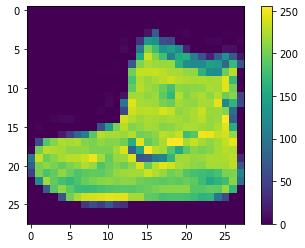

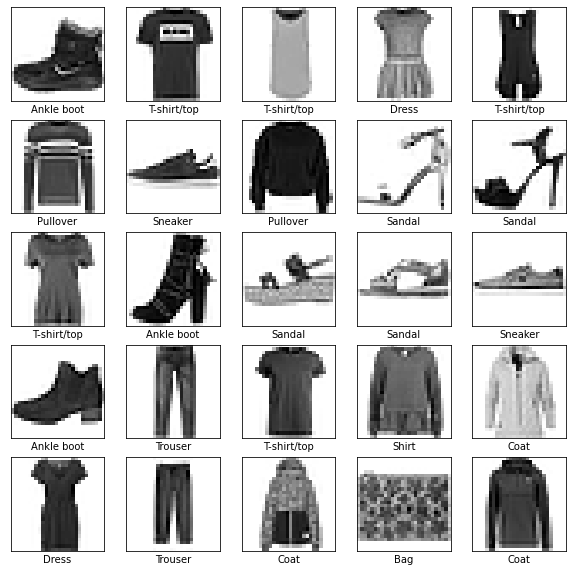

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5006 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3766 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3384 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3127 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2954 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2700 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2561 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2464 - accuracy: 0.9088
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

9

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

train_images.shape 

len(train_labels) 
train_labels
 
test_images.shape 
len(test_labels)
 
plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False) 
plt.show() 

train_images = train_images / 255.0 
test_images = test_images / 255.0 
plt.figure(figsize=(10,10)) 

for i in range(25): 
    plt.subplot(5,5,i+1) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.grid(False) 
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]]) 
plt.show() 

model = tf.keras.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(10) 
]) 
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy']) 
model.fit(train_images, train_labels, epochs=10) 

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) 

print('\nTest accuracy:', test_acc) 

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()]) 
predictions = probability_model.predict(test_images)
 
predictions[0] 

np.argmax(predictions[0]) 

test_labels[0] 

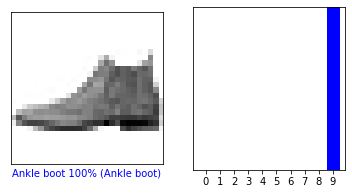

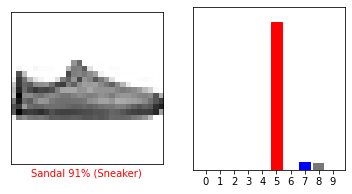

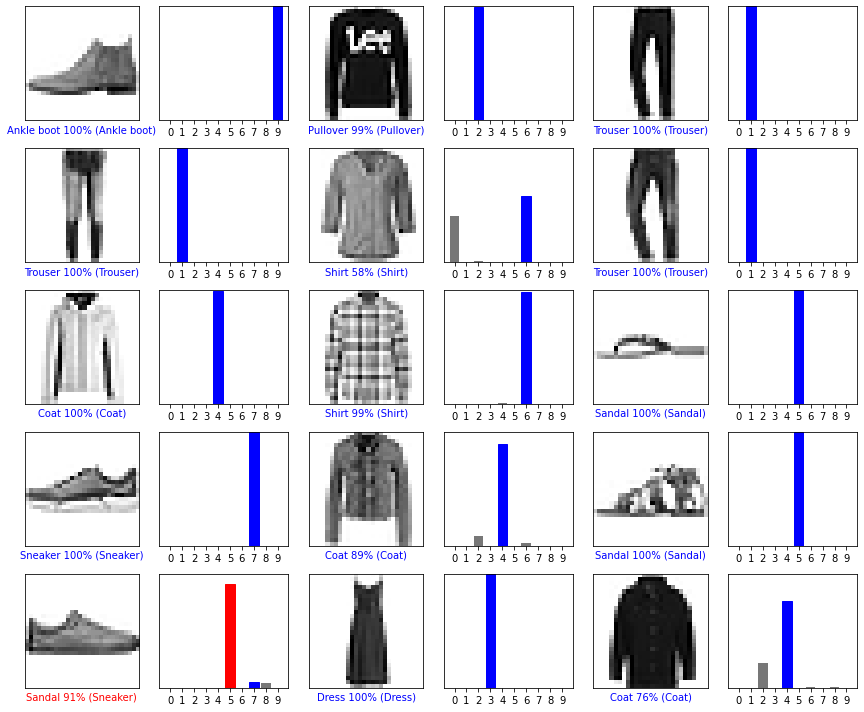

(28, 28)
(1, 28, 28)


In [3]:
def plot_image(i, predictions_array, true_label, img): 
  true_label, img = true_label[i], img[i] 
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.imshow(img, cmap=plt.cm.binary) 
  predicted_label = np.argmax(predictions_array) 
  if predicted_label == true_label: 
    color = 'blue' 
  else: 
    color = 'red' 
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                100*np.max(predictions_array), 
                                class_names[true_label]), 
                                color=color)
   
def plot_value_array(i, predictions_array, true_label): 
  true_label = true_label[i] 
  plt.grid(False) 
  plt.xticks(range(10)) 
  plt.yticks([]) 
  thisplot = plt.bar(range(10), predictions_array, color="#777777") 
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array) 
  thisplot[predicted_label].set_color('red') 
  thisplot[true_label].set_color('blue') 
   
i = 0 
plt.figure(figsize=(6,3)) 
plt.subplot(1,2,1) 
plot_image(i, predictions[i], test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions[i],  test_labels) 
plt.show()   
i = 12 
plt.figure(figsize=(6,3)) 
plt.subplot(1,2,1) 
plot_image(i, predictions[i], test_labels, test_images) 
plt.subplot(1,2,2) 
plot_value_array(i, predictions[i],  test_labels) 
plt.show() 

# Plot the first X test images, their predicted labels, and the true labels. 
# Color correct predictions in blue and incorrect predictions in red. 
num_rows = 5 
num_cols = 3 
num_images = num_rows*num_cols 
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) 
for i in range(num_images): 
  plt.subplot(num_rows, 2*num_cols, 2*i+1) 
  plot_image(i, predictions[i], test_labels, test_images) 
  plt.subplot(num_rows, 2*num_cols, 2*i+2) 
  plot_value_array(i, predictions[i], test_labels) 
plt.tight_layout() 
plt.show() 

# Grab an image from the test dataset. 
img = test_images[1] 
print(img.shape) 

# Add the image to a batch where it's the only member. 
img = (np.expand_dims(img,0)) 
print(img.shape) 
    

[[6.7819579e-04 1.0319338e-13 9.9221259e-01 3.3275274e-10 5.5461768e-03
  8.0476931e-17 1.5629990e-03 9.8768333e-19 1.8992845e-09 2.7576828e-16]]


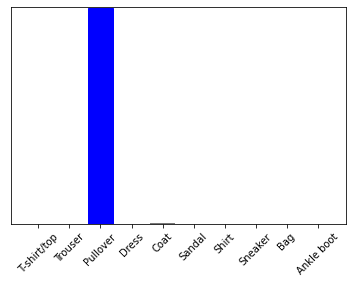

2

In [5]:
predictions_single = probability_model.predict(img)
 
print(predictions_single) 

plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45) 
plt.show() 

np.argmax(predictions_single[0]) 